---


# Ce notebook illustre les effets principaux de la numérisation du son.


---


<div class="alert alert-block alert-warning">
<b>Important:</b> Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.
</div>

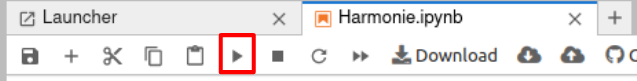

Pour pouvoir manipuler des sons avec python, il nous faut quelques "extensions", que l'on va installer en lançant les deux cases ci-dessous.
L'exécution d'une case peut prendre $\sim 5\ à\ 20$ secondes.

Le port d'écouteurs ou d'un casque est conseillé, sinon assurez-vous de ne pas perturber vos camarades avec les sons écoutés.


In [5]:
%pip install matplotlib
%pip install pydub
%pip install scipy
print("Installations terminées")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Installations terminées


In [7]:
%matplotlib inline
from ipywidgets import interactive,interact
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import locale
#from scipy.signal import blackman
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


/srv/conda/envs/notebook/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


***

Il est possible d'émuler le bruit que fait une note au piano numériquement, en créant un synthétiseur numérique (un "synthé").

<div class="alert alert-block alert-info">
<b>Fonctionnement du code :</b> En lançant le code ci-dessous, vous pouvez sélectionner une note parmi deux octaves (n°3 et n°4), pour voir l'allure de l'enregistrement du son ainsi que son spectre.
</div>

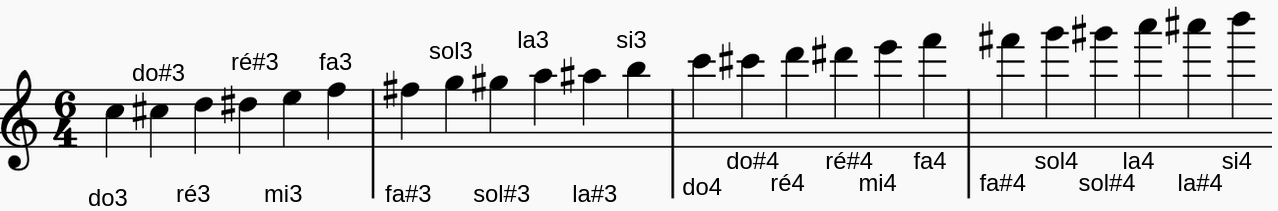

***


In [8]:




plt.rcParams.update({'font.size': 18})
#locale.setlocale(locale.LC_ALL, '')
plt.rcParams['axes.formatter.use_locale'] = False

Tmin = 0
Tmax = 10
Tmaxplot=0.025
points = 1000

pianoPSF = [0.3,0.03,0.03,0.03,0.05,0.01,0.02,0.01,0.005]#d'après  Synthesizing the note-specific atoms based on their fundamental frequency, used for single-channel musical source separation
pianoPSF = [0.3,0.06,0.06,0.06,0.1,0.02,0.04,0.02,0.01] #exagéré pour lecture graphique

banque_notes = ["do3","do#3","ré3","ré#3","mi3","fa3","fa#3","sol3","sol#3","la3","la#3","si3","do4","do#4","ré4","ré#4","mi4","fa4","fa#4","sol4","sol#4","la4","la#4","si4"]
#banque_fréquences = [262,277,294,311,330,349,370,392,415,440,466,493,523,554,587,622,659,698,740,784,831,880,932,988]
#print(len(banque_fréquences))
banque_fréquences = [261.63,277.18,293.66,311.13,329.63,349.23,369.99,392,415.30,440,466.16,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99,783.99,830.61,880,932.33,987.77]
#print(len(banque_fréquences))


def ispeak(freqplot,notesfrequences,step):
    out_fft = np.zeros(np.shape(freqplot))
    for i in range(len(freqplot)) :
        for freq in notesfrequences:
            if abs(freqplot[i]-freq) < step*0.49:
                out_fft[i] = 1
    return(out_fft)

def f(note_jouee):

    x = np.linspace(Tmin, Tmaxplot,points)

    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(19,6))


    isnote1 = [note_jouee==noti for noti in banque_notes]
    #isnote1,isnote2,isnote3 = np.array(isnote1),np.array(isnote2),np.array(isnote3)
    isnote = [isnote1[run] for run in range(len(isnote1))]
    notesfreq = [banque_fréquences[run] for run in range(len(isnote1)) if isnote[run]]
    notesname = [banque_notes[run] for run in range(len(isnote1)) if isnote[run]]
    #print(isnote)
    sum = np.zeros(np.shape(x))
    """for noteindex in range(len(isnote)):
        if isnote[noteindex]:
            sum = sum+ np.sin(2*np.pi*x*banque_fréquences[noteindex])"""
    for note in notesfreq :
        for harmonic in range(len(pianoPSF)):
            sum = sum+ np.sin(2*np.pi*x*note*(harmonic+1))*pianoPSF[harmonic]
    sum = sum-np.mean(sum)
    #print(np.shape(x),np.shape(sum))
    axs[0].plot(x*1000, sum ,color = 'black',linewidth = 2)

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")



    pts_fft=300000
    xfft = np.linspace(Tmin, Tmax,pts_fft)


    for note in range(len(notesfreq)) :
        sumfft = np.zeros(np.shape(xfft))
        for harmonic in range(len(pianoPSF)):
            sumfft = sumfft+ np.sin(2*np.pi*xfft*notesfreq[note]*(harmonic+1))*pianoPSF[harmonic]
        #sumfft = sumfft-np.mean(sumfft)
        #sumfft = np.sin(2*np.pi*xfft*notesfreq[note])
        #w = blackman(pts_fft)
        w=pts_fft
        tx  = np.fft.fft(sumfft*w );
        freqplot = np.fft.fftfreq(xfft.shape[-1],d=(Tmax-Tmin)/pts_fft)

        freqmax = 9.5*notesfreq[0]
        tokeep = [i>=0 and i<freqmax for i in freqplot]
        freqplotfinal = [freqplot[i] for i in range(len(freqplot)) if tokeep[i]]
        #txfinal = [abs(tx[i])/np.max((200,freqplot[i])) for i in range(len(tx)) if tokeep[i]]
        txfinal = [abs(tx[i]) for i in range(len(tx)) if tokeep[i]]


        axs[1].plot(freqplotfinal, txfinal ,color = 'C'+str(note),linewidth = 2,label= notesname[note])
        #axs[1].set_ylim((50,np.max(txfinal)*1.5))
        #axs[1].set_xlim((0,1200))

    sr = 22050
    points_save = int((Tmax-Tmin)*sr)
    tsave = np.linspace(Tmin,Tmax,points_save)
    sumsave = np.zeros(np.shape(tsave))
    for note in range(len(notesfreq)) :
        for harmonic in range(len(pianoPSF)):
            sumsave = sumsave+ np.sin(2*np.pi*tsave*notesfreq[note]*(harmonic+1))*pianoPSF[harmonic]

    sound = ipd.Audio(sumsave, rate=sr, autoplay=False)



    axs[1].set_ylabel("Amplitude (mV)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);
    axs[1].grid(which='major', color='#DDDDDD', linewidth=3)

    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)

    axs[1].minorticks_on()

    plt.legend(loc = 'upper right')
    plt.show()

    return sound

#actualisation de la barre d'actualisation dynamique
interactive_plot = interact(f, note_jouee=banque_notes)
#output = interactive_plot.children[-1]
#output.layout.height = '700px'
#interactive_plot

interactive(children=(Dropdown(description='note_jouee', options=('do3', 'do#3', 'ré3', 'ré#3', 'mi3', 'fa3', …

Pour s'échauffer sur les notions de spectre, de fréquence fondamentale et d'harmonique, vous pouvez vous aider du code pour répondre aux questions **Q1**, **Q2.** et **Q3.** ✅.

***




Si on résume par exemple les réponses à la question 1 en un graphique :
<details>
<summary>Cliquer ici pour afficher l'image</summary>


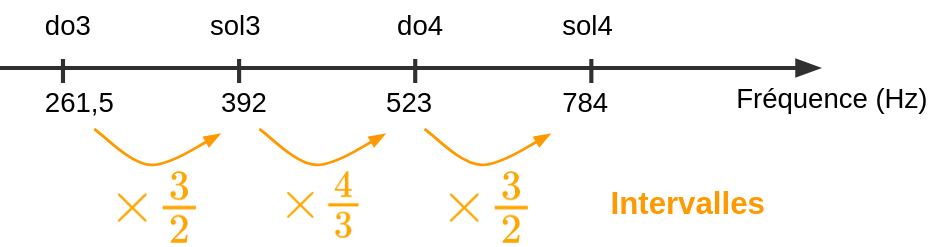

</details>

On notera dans le cadre "intervalle" du cours :
<div class="alert alert-block alert-info">
<b>Intervalle</b> En musique, un intervalle entre deux sons est défini par le rapport entre leurs fréquences fondamentales.
</div>

Par exemple, l'intervalle entre le mi3 (de fréquence fondamentale 330 Hz) et le la3 (de fréquence fondamentale 440Hz) vaut 440/330 = 4/3.

Avec la question 3, on voit également que pour passer du do d'une octave à l'autre, il suffit de doubler sa fréquence !
On notera donc dans le cadre du cours "octave" :

<div class="alert alert-block alert-info">
<b>Octave</b> Deux sons dont les fréquences sont dans le rapport 2/1
correspondent à une même note, à deux hauteurs différentes. L'intervalle qui les sépare s'appelle une octave.
</div>

On notera dans le cadre "gamme" du cours :
<div class="alert alert-block alert-info">
<b>Gamme : </b> Une gamme est une suite de notes réparties sur une octave, 12 notes pour la gamme tempérée.
</div>


On parle d'harmonie lorsque plusieurs sons vont bien ensemble.

$\longrightarrow$ Ok! donc il nous faut <b>plusieurs</b> notes!

In [9]:
plt.rcParams.update({'font.size': 18})
#locale.setlocale(locale.LC_ALL, '')
#plt.rcParams['axes.formatter.use_locale'] = True

Tmin = 0
Tmax = 10
Tmaxplot=0.05
points = 1000

pianoPSF = [0.3,0.03,0.03,0.03,0.05,0.01,0.02,0.01,0.005]#d'après  Synthesizing the note-specific atoms based on their fundamental frequency, used for single-channel musical source separation
pianoPSF = [0.3,0.06,0.06,0.06,0.1,0.02,0.04,0.02,0.01] #exagéré pour lecture graphique

banque_notes = ["do3","do#3","ré3","ré#3","mi3","fa3","fa#3","sol3","sol#3","la3","la#3","si3","do4","do#4","ré4","ré#4","mi4","fa4","fa#4","sol4","sol#4","la4","la#4","si4"]
#banque_fréquences = [262,277,294,311,330,349,370,392,415,440,466,493,523,554,587,622,659,698,740,784,831,880,932,988]
#print(len(banque_fréquences))
banque_fréquences = [261.63,277.18,293.66,311.13,329.63,349.23,369.99,392,415.30,440,466.16,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99,783.99,830.61,880,932.33,987.77]
#print(len(banque_fréquences))


def ispeak(freqplot,notesfrequences,step):
    out_fft = np.zeros(np.shape(freqplot))
    for i in range(len(freqplot)) :
        for freq in notesfrequences:
            if abs(freqplot[i]-freq) < step*0.49:
                out_fft[i] = 1
    return(out_fft)

def f(note1,note2,note3):

    x = np.linspace(Tmin, Tmaxplot,points)

    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(18,6))


    isnote1,isnote2,isnote3 = [note1==noti for noti in banque_notes],[note2==noti for noti in banque_notes],[note3==noti for noti in banque_notes]
    #isnote1,isnote2,isnote3 = np.array(isnote1),np.array(isnote2),np.array(isnote3)
    isnote = [isnote1[run] or isnote2[run] or isnote3[run] for run in range(len(isnote1))]
    notesfreq = [banque_fréquences[run] for run in range(len(isnote1)) if isnote[run]]
    notesname = [banque_notes[run] for run in range(len(isnote1)) if isnote[run]]
    #print(isnote)
    sum = np.zeros(np.shape(x))
    """for noteindex in range(len(isnote)):
        if isnote[noteindex]:
            sum = sum+ np.sin(2*np.pi*x*banque_fréquences[noteindex])"""
    for note in notesfreq :
        for harmonic in range(len(pianoPSF)):
            sum = sum+ np.sin(2*np.pi*x*note*(harmonic+1))*pianoPSF[harmonic]
    sum = sum-np.mean(sum)
    #print(np.shape(x),np.shape(sum))
    axs[0].plot(x*1000, sum ,color = 'black',linewidth = 2)

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")



    pts_fft=300000
    xfft = np.linspace(Tmin, Tmax,pts_fft)


    for note in range(len(notesfreq)) :
        sumfft = np.zeros(np.shape(xfft))
        for harmonic in range(len(pianoPSF)):
            sumfft = sumfft+ np.sin(2*np.pi*xfft*notesfreq[note]*(harmonic+1))*pianoPSF[harmonic]
        #sumfft = sumfft-np.mean(sumfft)
        #sumfft = np.sin(2*np.pi*xfft*notesfreq[note])
        #w = blackman(pts_fft)
        w = pts_fft
        tx  = np.fft.fft(sumfft*w );
        freqplot = np.fft.fftfreq(xfft.shape[-1],d=(Tmax-Tmin)/pts_fft)

        freqmax = 9.5*notesfreq[0]
        tokeep = [i>=0 and i<freqmax for i in freqplot]
        freqplotfinal = [freqplot[i] for i in range(len(freqplot)) if tokeep[i]]
        #txfinal = [abs(tx[i])/np.max((200,freqplot[i])) for i in range(len(tx)) if tokeep[i]]
        txfinal = [abs(tx[i]) for i in range(len(tx)) if tokeep[i]]


        axs[1].plot(freqplotfinal, txfinal ,color = 'C'+str(note),linewidth = 2,label= notesname[note],alpha = 0.5)


    axs[1].grid(which='major', color='#DDDDDD', linewidth=3)

    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)

    axs[1].minorticks_on()
    axs[1].set_ylabel("Amplitude (mV)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);


    plt.legend(loc = 'upper right')
    plt.show()

#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(f, note1=banque_notes,note2=banque_notes,note3=banque_notes)
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(Dropdown(description='note1', options=('do3', 'do#3', 'ré3', 'ré#3', 'mi3', 'fa3', 'fa#3…

Avec le code ci-dessus, répondre à la question **Q4** ✅.

***


Par exemple, l'accord de do majeur se joue avec do, mi et sol d'une même octave. On voit avec les résultats de la question 4 que certaines harmoniques des différentes notes se superposent.

On notera dans le cadre du cours :

<div class="alert alert-block alert-info">
<b>Accord harmonieux </b> Un accord est considéré comme harmonieux lorsque certaines harmoniques de différentes note se superposent.
</div>


In [11]:

plt.rcParams.update({'font.size': 18})


Tmin = 0
Tmax = 10
Tmaxplot=0.05
points = 1000

pianoPSF = [0.3,0.03,0.03,0.03,0.05,0.01,0.02,0.01,0.005]#d'après  Synthesizing the note-specific atoms based on their fundamental frequency, used for single-channel musical source separation
#pianoPSF = [0.3,0.06,0.06,0.06,0.1,0.02,0.04,0.02,0.01] #exagéré pour lecture graphique

banque_notes = ["do3","do#3","ré3","ré#3","mi3","fa3","fa#3","sol3","sol#3","la3","la#3","si3","do4","do#4","ré4","ré#4","mi4","fa4","fa#4","sol4","sol#4","la4","la#4","si4"]

banque_fréquences = [261.63,277.18,293.66,311.13,329.63,349.23,369.99,392,415.30,440,466.16,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99,783.99,830.61,880,932.33,987.77]
#print(len(banque_fréquences))


def ispeak(freqplot,notesfrequences,step):
    out_fft = np.zeros(np.shape(freqplot))
    for i in range(len(freqplot)) :
        for freq in notesfrequences:
            if abs(freqplot[i]-freq) < step*0.49:
                out_fft[i] = 1
    return(out_fft)

def f(note1,note2,note3,note4):

    x = np.linspace(Tmin, Tmaxplot,points)

    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(18,6))


    isnote1,isnote2,isnote3,isnote4 = [note1==noti for noti in banque_notes],[note2==noti for noti in banque_notes],[note3==noti for noti in banque_notes],[note4==noti for noti in banque_notes]
    #isnote1,isnote2,isnote3 = np.array(isnote1),np.array(isnote2),np.array(isnote3)
    isnote = [isnote1[run] or isnote2[run] or isnote3[run]or isnote4[run] for run in range(len(isnote1))]
    notesfreq = [banque_fréquences[run] for run in range(len(isnote1)) if isnote[run]]
    notesname = [banque_notes[run] for run in range(len(isnote1)) if isnote[run]]
    #print(isnote)
    sum = np.zeros(np.shape(x))

    for note in notesfreq :
        for harmonic in range(len(pianoPSF)):
            sum = sum+ np.sin(2*np.pi*x*note*(harmonic+1))*pianoPSF[harmonic]
    sum = sum-np.mean(sum)
    #print(np.shape(x),np.shape(sum))
    axs[0].plot(x*1000, sum ,color = 'black',linewidth = 2)

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")



    pts_fft=300000
    xfft = np.linspace(Tmin, Tmax,pts_fft)


    for note in range(len(notesfreq)) :
        sumfft = np.zeros(np.shape(xfft))
        for harmonic in range(len(pianoPSF)):
            sumfft = sumfft+ np.sin(2*np.pi*xfft*notesfreq[note]*(harmonic+1))*pianoPSF[harmonic]
        #sumfft = sumfft-np.mean(sumfft)
        #sumfft = np.sin(2*np.pi*xfft*notesfreq[note])
        #w = blackman(pts_fft)
        w=pts_fft
        tx  = np.fft.fft(sumfft*w );
        freqplot = np.fft.fftfreq(xfft.shape[-1],d=(Tmax-Tmin)/pts_fft)

        freqmax = 9.5*notesfreq[0]
        tokeep = [i>=0 and i<freqmax for i in freqplot]
        freqplotfinal = [freqplot[i] for i in range(len(freqplot)) if tokeep[i]]
        #txfinal = [abs(tx[i])/np.max((200,freqplot[i])) for i in range(len(tx)) if tokeep[i]]
        txfinal = [abs(tx[i]) for i in range(len(tx)) if tokeep[i]]


        axs[1].plot(freqplotfinal, txfinal ,color = 'C'+str(note),linewidth = 2,label= notesname[note],alpha = 0.5)



    axs[1].set_ylabel("Amplitude (mV)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);


    plt.legend(loc = 'upper right')
    plt.show()


    sr = 22050
    points_save = int((Tmax-Tmin)*sr)
    tsave = np.linspace(Tmin,Tmax,points_save)
    sumsave = np.zeros(np.shape(tsave))
    for note in range(len(notesfreq)) :
        for harmonic in range(len(pianoPSF)):
            sumsave = sumsave+ np.sin(2*np.pi*tsave*notesfreq[note]*(harmonic+1))*pianoPSF[harmonic]

    sound = ipd.Audio(sumsave, rate=sr, autoplay=True)
    return sound

#actualisation de la barre d'actualisation dynamique
interact_plot = interact(f, note1=banque_notes,note2=banque_notes,note3=banque_notes,note4=banque_notes)
#output = interact_plot.children[-1]
#output.layout.height = '650px'
#interact_plot

interactive(children=(Dropdown(description='note1', options=('do3', 'do#3', 'ré3', 'ré#3', 'mi3', 'fa3', 'fa#3…

Si vous ne connaissez pas la théorie musicale, vous pouvez tester des accords parmi  <details>
<summary>cette liste : </summary>
do-mi-sol-do
do-mi-sol-la#
do-ré#-sol.
mi-sol#-si
fa#-la-ré
fa-la-ré                                                                         </details>

Au contraire, si vous voulez entendre des accords qui sonnent faux, ajoutez des notes successives (do-do#-ré-ré# par exemple), dont les harmoniques audibles ne se recouvriront donc pas.

Si vous cherchez plus d'accords qui sonneront harmonieux sans connaître la théorie musicale, vous pouvez en piocher sur ce lien :
https://blog.allegromusique.fr/les-accords-au-piano-indispensables-%C3%A0-conna%C3%AEtre

***

Pour vous entraîner au quizz final, vous avez maintenant tous les outils pour répondre aux questions **Q5** à **Q7** ✅.

Pour aller plus loin :
Puisqu'il y a 12 notes par octave, montrer que l'intervalle entre deux notes successives (ré-ré#, ré#-mi, etc.) est simplement de $2^{\frac{1}{12}}$.

                                                                    